# Практика

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [30]:
# распределение dgamma: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dgamma.html#scipy.stats.dgamma
a = 1.1
dgamma_rv = sts.dgamma(a)
# Generate random numbers
dgamma_sample = dgamma_rv.rvs(1000)
# dgamma_sample

In [5]:
dgamma_sample.dtype

dtype('float64')

In [6]:
real_mean = dgamma_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [7]:
real_var = dgamma_rv.var() # настоящая дисперсия случайной величины
real_var

2.3100000000000005

In [25]:
real_std = dgamma_rv.std()
real_std

1.5198684153570665

### Постройте гистограмму выборки и теоретическую плотность распределения

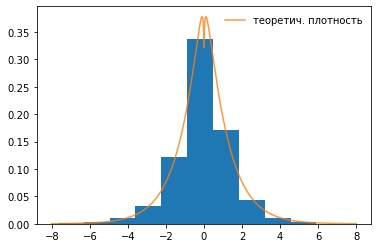

In [65]:
plt.hist(dgamma_sample, density=True)
x = np.linspace(-8,8,1000)
pdf = dgamma_rv.pdf(x)
plt.plot(x, pdf, label='теоретич. плотность', alpha=0.8)
plt.legend(loc='upper right', frameon=False)

In [32]:
dgamma_sample_mean = dgamma_sample.mean() # выборочное среднее
print(dgamma_sample_mean)
dgamma_sample_var = dgamma_sample.var() # выборочная дисперсия
print(dgamma_sample_var)

-0.08033444783004427
2.1734156790742616


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

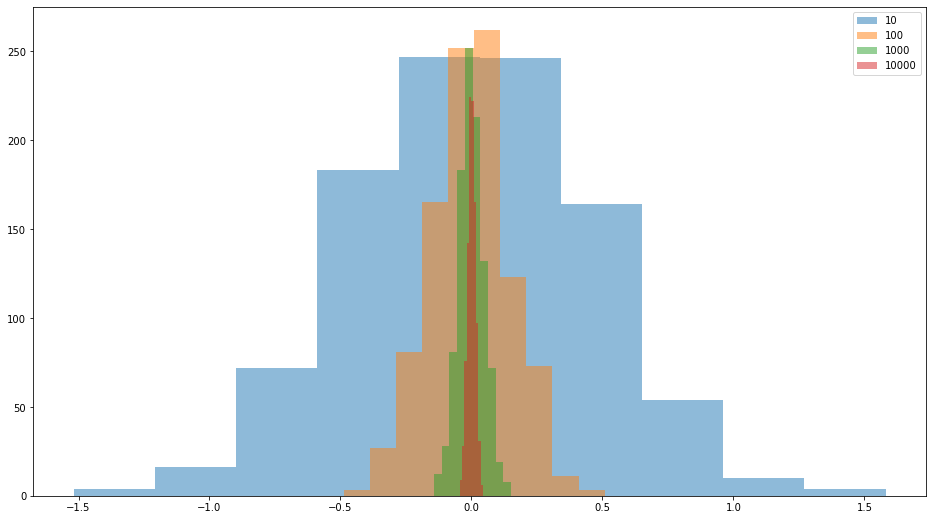

In [51]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
        means.append(np.mean(dgamma_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [58]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(dgamma_rv.rvs(N)))

means = np.array(means).astype(np.float32)

[]

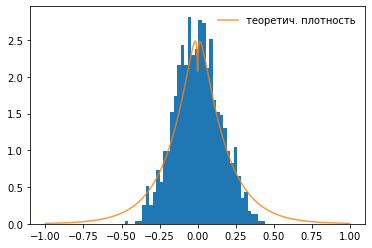

In [63]:
real_dgamma_rv = sts.dgamma(a, loc=dgamma_rv.mean(), scale=dgamma_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(-1,1, 1000)
pdf = real_dgamma_rv.pdf(x)
plt.plot(x, pdf, label='теоретич. плотность', alpha=0.8)
plt.legend(loc='upper right', frameon=False)
plt.plot()

In [60]:
data = dgamma_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 2 * dgamma_rv.std() / np.sqrt(N), np.mean(data) + 2 * dgamma_rv.std() / np.sqrt(N) 
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [-0.12138029561518207, 0.4865670705276446] 


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
# Для dgamma распределения апроксимация распределения выборочного среднего, на мой взгляд, работает плохо, 
# так как оно сильно сглаживает погрешности эксперимента.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing